# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv',parse_dates=['fecha'], sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv',parse_dates=['fecha'], sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv',parse_dates=['fecha'], sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv',parse_dates=['fecha'], sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         812153 non-null  int64         
 1   fecha           812153 non-null  datetime64[ns]
 2   hora_inicio     812153 non-null  int64         
 3   hora_fin        812153 non-null  int64         
 4   dia             812153 non-null  object        
 5   estacion        812153 non-null  object        
 6   sentido         812153 non-null  object        
 7   tipo_vehiculo   812153 non-null  object        
 8   forma_pago      812153 non-null  object        
 9   cantidad_pasos  812153 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   periodo         1375908 non-null  int64         
 1   fecha           1375908 non-null  datetime64[ns]
 2   hora_inicio     1375908 non-null  int64         
 3   hora_fin        1375908 non-null  int64         
 4   dia             1375908 non-null  object        
 5   estacion        1375908 non-null  object        
 6   sentido         1375908 non-null  object        
 7   tipo_vehiculo   1375908 non-null  object        
 8   forma_pago      1375908 non-null  object        
 9   cantidad_pasos  1375908 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   periodo         1372645 non-null  int64         
 1   fecha           1372645 non-null  datetime64[ns]
 2   hora_inicio     1372645 non-null  int64         
 3   hora_fin        1372645 non-null  int64         
 4   dia             1372645 non-null  object        
 5   estacion        1372645 non-null  object        
 6   sentido         1372645 non-null  object        
 7   tipo_vehiculo   1372645 non-null  object        
 8   forma_pago      1372645 non-null  object        
 9   cantidad_pasos  1372645 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   periodo         1379443 non-null  int64         
 1   fecha           1379443 non-null  datetime64[ns]
 2   hora_inicio     1379443 non-null  int64         
 3   hora_fin        1379443 non-null  int64         
 4   dia             1379443 non-null  object        
 5   estacion        1379443 non-null  object        
 6   sentido         1379443 non-null  object        
 7   tipo_vehiculo   1379443 non-null  object        
 8   forma_pago      1379443 non-null  object        
 9   cantidad_pasos  1379443 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


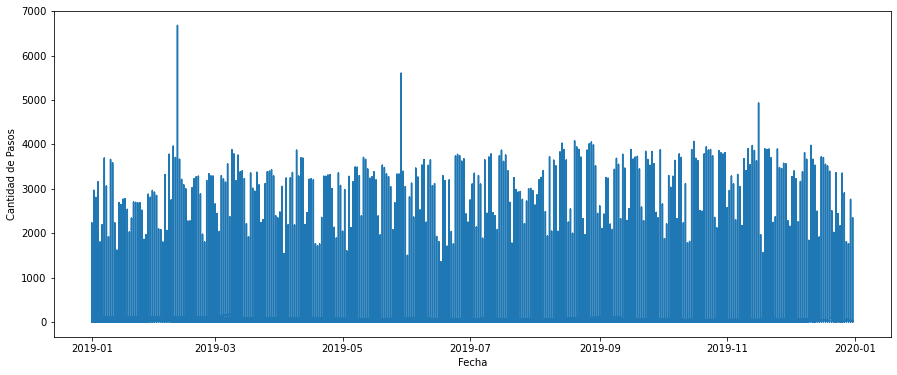

In [11]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2019.fecha, data_2019.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.show()

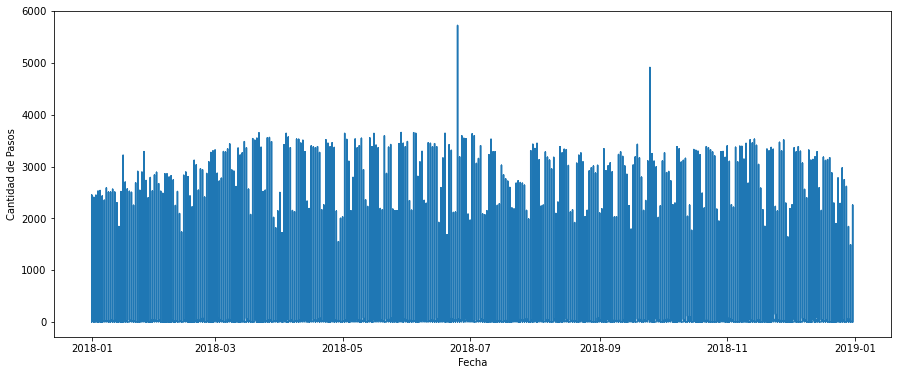

In [12]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2018.fecha, data_2018.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.show()

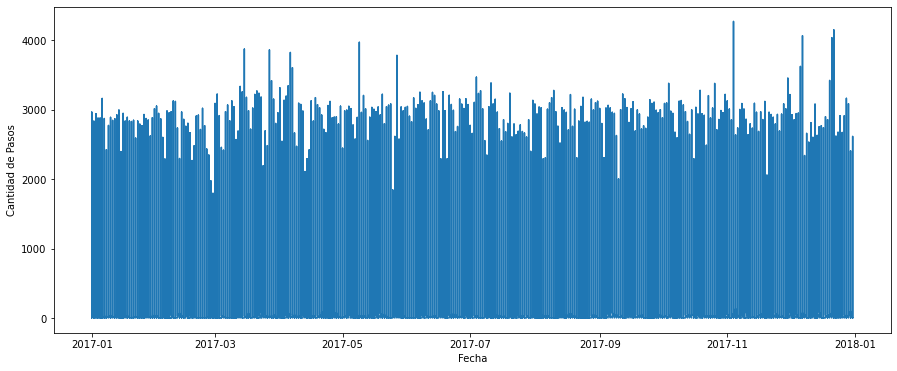

In [13]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2017.fecha, data_2017.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.show()

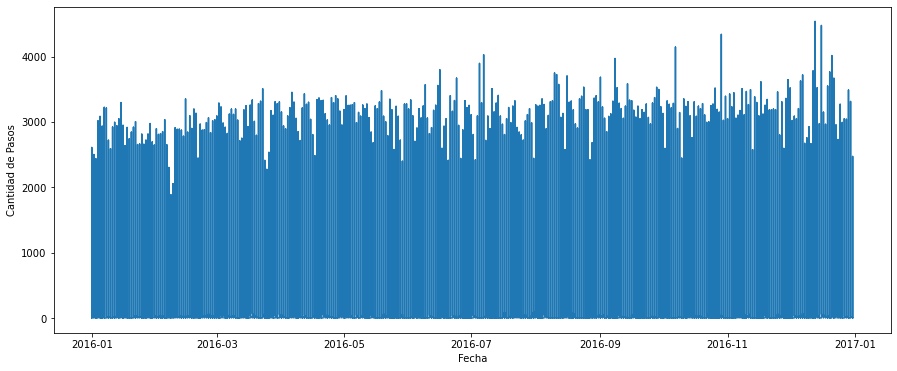

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2016.fecha, data_2016.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.show()

##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [15]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [16]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [17]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [18]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Viernes,Centro,Liviano,14,2016-01-01 00:00:00
1,Viernes,Centro,Pesado,3,2016-01-01 00:00:00
2,Viernes,Provincia,Liviano,66,2016-01-01 00:00:00
3,Viernes,Provincia,Pesado,1,2016-01-01 00:00:00
4,Viernes,Provincia,Pesado,4,2016-01-01 00:00:00
...,...,...,...,...,...
346561,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
346562,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
346563,Martes,Centro,Liviano,580,2019-12-31 22:00:00
346564,Martes,Centro,Liviano,214,2019-12-31 23:00:00


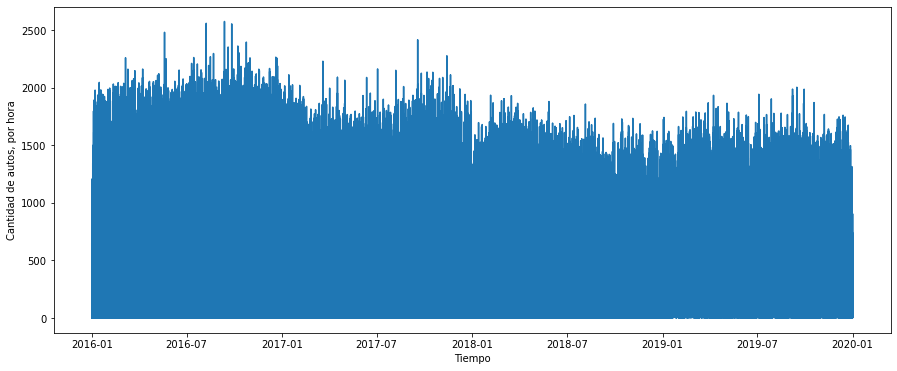

In [286]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [31]:
datos = dataset
datos.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,yr,año
0,Viernes,Centro,Liviano,14,2016-01-01,2016,2016
1,Viernes,Centro,Pesado,3,2016-01-01,2016,2016
2,Viernes,Provincia,Liviano,66,2016-01-01,2016,2016
3,Viernes,Provincia,Pesado,1,2016-01-01,2016,2016
4,Viernes,Provincia,Pesado,4,2016-01-01,2016,2016


### EXPLORACION DE LOS DATOS

### Analisis

Luego de hacer la union entre las tablas de los años 2016 hasta 2019 y hacemos los respectivos filtros quedamos con los datos unicamente del peaje de Illia con pago en EFECTIVO, podemos observar que desde el 2016 al 2019 hay un decremento en la cantidad de pasos con pago en efectivo, esto nos lleva a pensar que los usuarios migraron a otro metodo de pago que puede ser con tarjeta.

El mismo analisis aplica para los datos vistos desde tipo de vehículo, vemos un decremento en la cantidad de pasos desde el año 2016 hasta el 2019.

In [21]:
dataset['año'] = dataset['fecha'].dt.year
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,yr,año
0,Viernes,Centro,Liviano,14,2016-01-01,2016,2016
1,Viernes,Centro,Pesado,3,2016-01-01,2016,2016
2,Viernes,Provincia,Liviano,66,2016-01-01,2016,2016
3,Viernes,Provincia,Pesado,1,2016-01-01,2016,2016
4,Viernes,Provincia,Pesado,4,2016-01-01,2016,2016


In [26]:
cantidad_pasos_año = dataset.groupby(['año'])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )
print(cantidad_pasos_año)

      cantidad_pasos
año                 
2016        19221423
2017        17783512
2018        15966944
2019        14115125


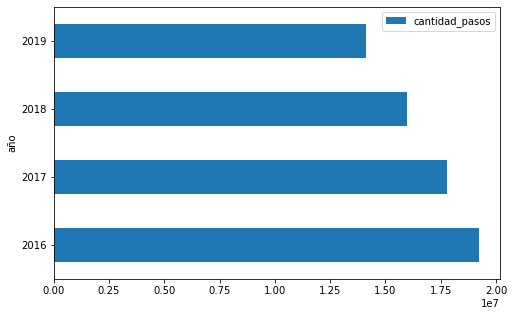

In [27]:
cantidad_pasos_año.plot(kind = 'barh' , figsize = (8,5)); 

In [28]:
cantidad_pasos_tipo = dataset.groupby(['año' , 'tipo_vehiculo'])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )

print(cantidad_pasos_tipo)

                    cantidad_pasos
año  tipo_vehiculo                
2016 Liviano              18307062
     Pesado                 914361
2017 Liviano              17097802
     Pesado                 685710
2018 Liviano              15442124
     Pesado                 524820
2019 Liviano              13798603
     Pesado                 316522


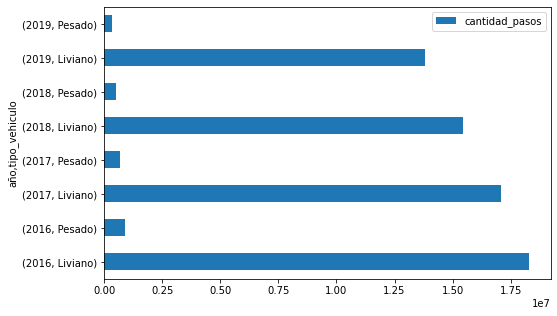

In [29]:
cantidad_pasos.plot(kind = 'barh' , figsize = (8,5)); 

### Analisis

Actualmente los datos están por días, parece que, en realidad, 2016 es el pico más alto en la cantidad de pasos con respecto a los demás años y se observa que en el año 2019 la cantidad de pasos cae posiblemente se debe a que migraron a otro metodo de pago diferente al efectivo.

<AxesSubplot:>

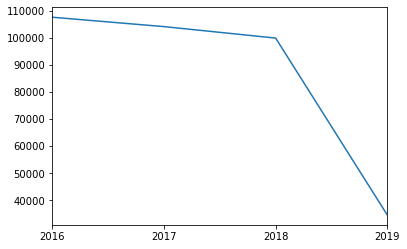

In [32]:
datos['fecha'].value_counts().resample('Y').sum().plot.line()

In [37]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = datos.resample('D', on = 'fecha').sum()
diario.drop(columns=['año'], inplace = True)
print(diario.shape)
diario.head()

(1461, 2)


,cantidad_pasos,yr
fecha,,
2016-01-01,25602,409248
2016-01-02,36136,510048
2016-01-03,37225,514080
2016-01-04,50312,566496
2016-01-05,49907,562464


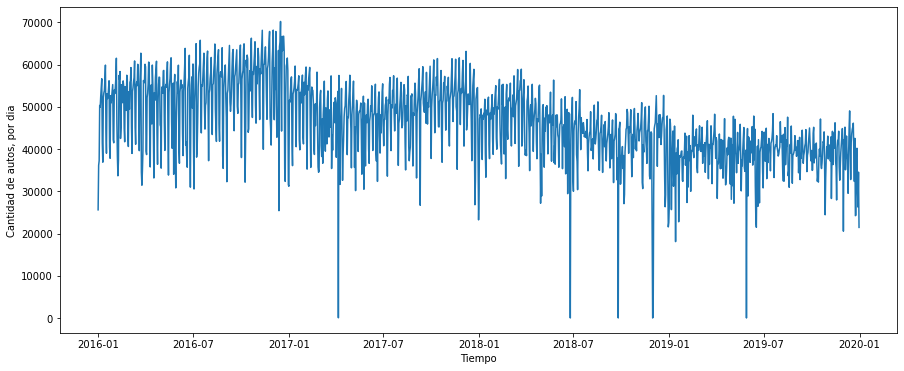

In [38]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Verificación de la serie

La serie esta completa

In [39]:
(diario.index==pd.date_range(start=diario.index.min(),
                            end=diario.index.max(),
                            freq=diario.index.freq)).all()

True

### Analisis
La serie cuenta con valores atipicos,  para este caso se procede a realizar un interpolate con cantidad de pasos inferiores a 20.000 ya que en la data se identifica que son lso valores con tendecia a 0. Se proceso a validar con una '2018-06-05' para garantizar que se hizo correctamente el interpolate().

Text(0.5, 1.0, 'Distribución por número pasos dia')

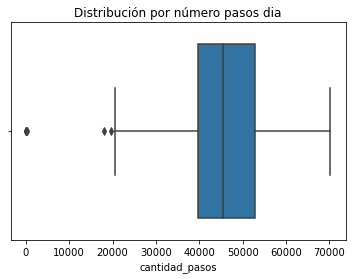

In [40]:
sns.boxplot(data = diario , x = "cantidad_pasos").set_title("Distribución por número pasos dia")

In [41]:
#Realizo interpolate
diario.cantidad_pasos[diario.cantidad_pasos < 20000] = np.nan
diario = diario.interpolate()
print(diario.shape)
diario.head()

(1461, 2)


,cantidad_pasos,yr
fecha,,
2016-01-01,25602.0,409248
2016-01-02,36136.0,510048
2016-01-03,37225.0,514080
2016-01-04,50312.0,566496
2016-01-05,49907.0,562464


In [42]:
diario[diario.index == '2018-06-05']

,cantidad_pasos,yr
fecha,,
2018-06-05,45862.0,548896


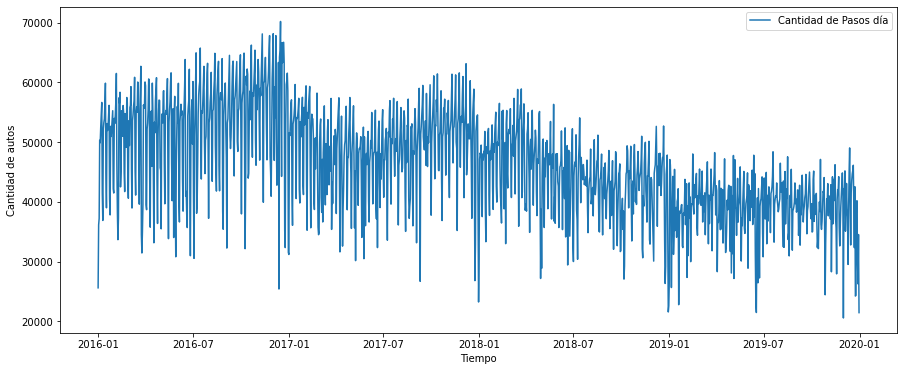

In [43]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, label ='Cantidad de Pasos día')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.legend()
plt.show()


### Análisis

Los gráficos de autocorrelación y autocorrelación parcial muestran una clara asociación entre la demanda los pasos y los pasos anteriores en el tiempo, así como entre el paso de los vvehiculso de una fecha y la el paso de los vehiculos de esa misma fecha los días anteriores. Este tipo de correlación, es un indicativo de que los modelos autorregresivos pueden funcionar bien.

### AUTOCORRELACION

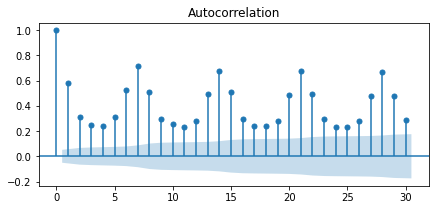

In [44]:
# Gráfico autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(diario.cantidad_pasos, ax=ax, lags=30)
plt.show()

### CORRELACION PARCIAL

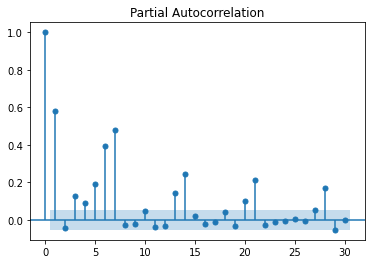

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diario.cantidad_pasos, lags = 30)
plt.show()

### ESTACIONALIDAD

Valor p>0.05 No se rechaza la hipótesis nula (H0), los datos tiene una raíz unitaria y no son estacionarios.
Valor p<=0.05 Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

### Analisis
Para neustro caso la variable P = 0.649135 esto quiere decir que esta por encima de 0.05 por consiguiente no se rechaza la hipótesis ya que no son datos estaconarios.

In [46]:
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result  = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.255819
p-value: 0.649135
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### ESTACIONALIDAD MENSUAL

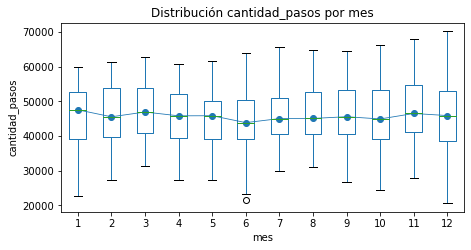

In [47]:
# Gráfico boxplot para estacionalidad mensual
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3.5))
diario['mes'] = diario.index.month
diario.boxplot(column='cantidad_pasos', by='mes', ax=ax,)
diario.groupby('mes')['cantidad_pasos'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('cantidad_pasos')
ax.set_title('Distribución cantidad_pasos por mes')
fig.suptitle('');

### COMPONENTES DE LA SERIE

#### Media Movil

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como rolling window. En general, se utiliza junto con la media, pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

Vamos a operar sobre la serie semanal promedio.

In [48]:
ventana = int(90)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1461, dtype: float64

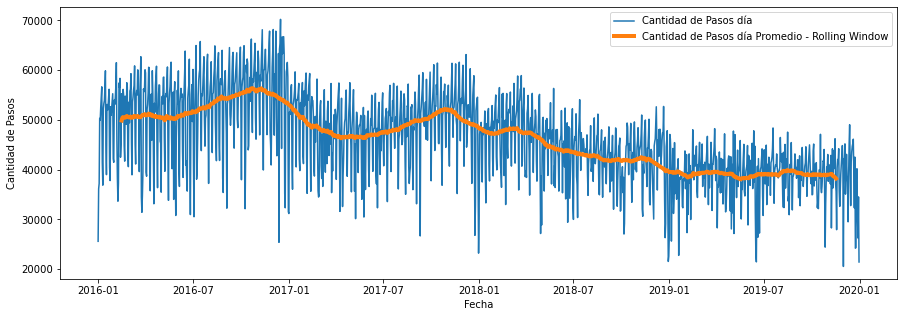

In [49]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Pasos día')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de Pasos día Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

#### Tendencia Lineal

Este método consiste simplemente en ajustar una regresión lineal a la serie. Ten en cuenta que la validez de este método es muy limitada.

Para comenzar, lo único que tenemos que tener en cuenta es que no podemos ajustar una regresión lineal con las fechas así como las tenemos, por lo que tenemos que pasarlas a un formato numérico

Se ejecuta ua ventan movil de 90 días para determinar cual es la tendencia con respecto al ultimo trimestre del 2019, se puede observar que la tendencía es descendiente como lo explicamos anteriormente, esto puede ser debido a que los usuarios migraron a otro metodo de pago.

In [50]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,yr,mes,fecha_numeros
fecha,,,,
2016-01-01,25602.0,409248,1,735964
2016-01-02,36136.0,510048,1,735965
2016-01-03,37225.0,514080,1,735966
2016-01-04,50312.0,566496,1,735967
2016-01-05,49907.0,562464,1,735968


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

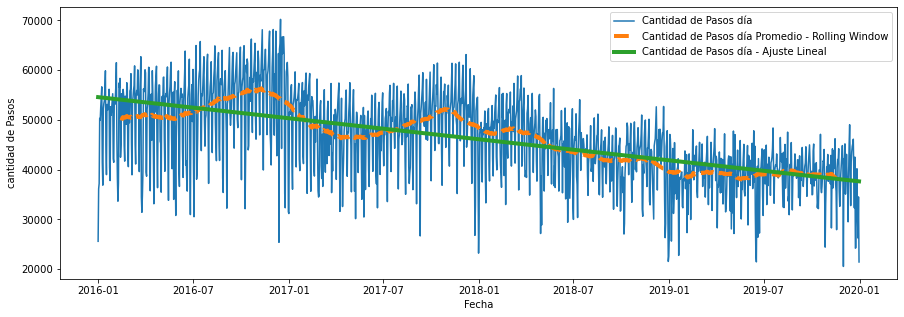

In [52]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Pasos día')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de Pasos día Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Pasos día - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('cantidad de Pasos')
plt.legend()
plt.show()

#### Restantes de las componentes

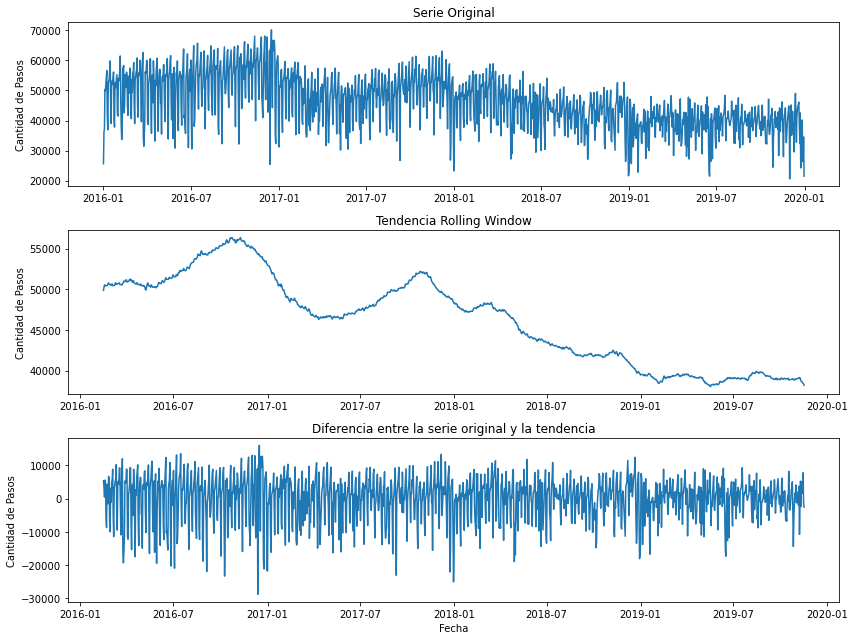

In [53]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.tight_layout()
plt.show()

Una forma común de interpretar las componentes es parándose en la tendencia y diferenciar el aporte de cada estación.

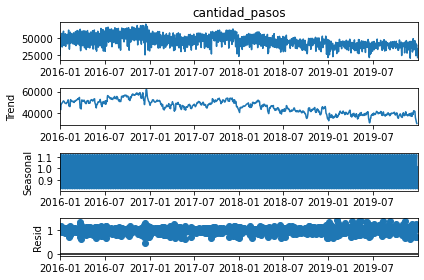

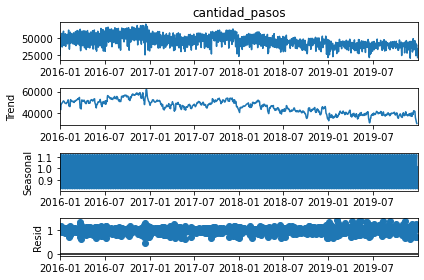

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='multiplicative') # “multiplicative”
result.plot()
#pyplot.show()

In [55]:
result.trend

fecha
2016-01-01             NaN
2016-01-02             NaN
2016-01-03             NaN
2016-01-04    43741.142857
2016-01-05    48175.857143
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1461, dtype: float64

In [56]:
result.seasonal

fecha
2016-01-01    1.119269
2016-01-02    0.925280
2016-01-03    0.824293
2016-01-04    0.982713
2016-01-05    1.010261
                ...   
2019-12-27    1.119269
2019-12-28    0.925280
2019-12-29    0.824293
2019-12-30    0.982713
2019-12-31    1.010261
Freq: D, Name: seasonal, Length: 1461, dtype: float64

### Análisis

Como se puede observar en el Trend, hay una caida sustancial en el número de pasos por el peaje Illia en tipo de pago en efectivo, esto demuestra la migración de usuario a diferentes metodos de pago.

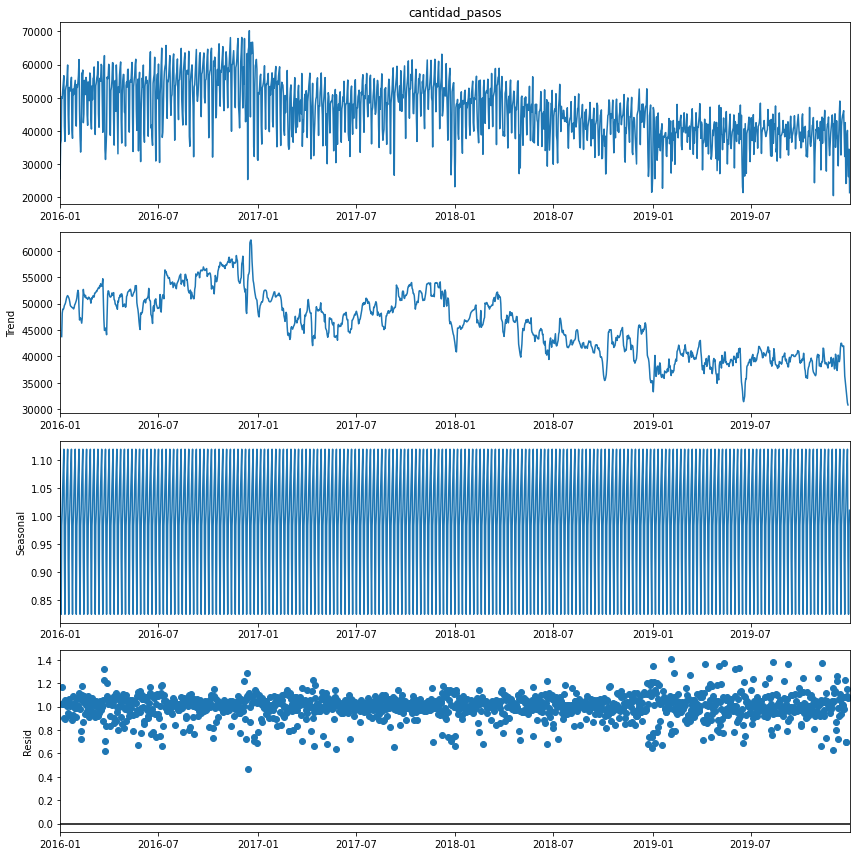

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

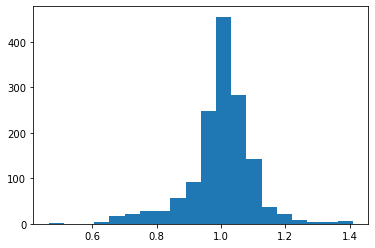

In [58]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

### PREDICCIÓN TERCER TRIMESTRO DE 2019

El primero modelo utilizado es `RandomForestRegressor` con 30% en tes y 70% en train, en los estimadores se utilizo el criterio 'MSE' (mean squared error) ya que es nuestro medida de  de validaciòn para nuestros modelo. Este modelo ya tiene todos los criterios que nos arrojo el algortimo de los mejores hiperparametros utilizando el modelo de Random Search (Se puede evidenciar en la parte inferior del modelo). 

Para este caso se utiliza un look_back de 360 días para tener datos suficientes para predecir el tercer trimestre del año 2019 y que los datos queden mucho más ajustados.

In [79]:
senial = diario.cantidad_pasos
senial.head()

fecha
2016-01-01    25602.0
2016-01-02    36136.0
2016-01-03    37225.0
2016-01-04    50312.0
2016-01-05    49907.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [80]:
diario.shape

(1461, 4)

In [81]:
look_back = 360 # usamos un anios de datos para predecir el valor siguiente

In [82]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1100, 360) (1100,)


In [83]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [84]:
X.shape

(1100, 360)

In [85]:
print(y)

[53153. 59662. 60291. ... 30681. 26259. 34523.]


In [86]:
X[0], y[0]

(array([25602., 36136., 37225., 50312., 49907., 52492., 54514., 56645.,
        41449., 36882., 52186., 53295., 53885., 56429., 59870., 44985.,
        38999., 53109., 51946., 52463., 54254., 56158., 40479., 37808.,
        52645., 50942., 52301., 53411., 55258., 42187., 41477., 53972.,
        53116., 54540., 56791., 61501., 46142., 38209., 33661., 37316.,
        57417., 56539., 58350., 42502., 45062., 55243., 53624., 50971.,
        56131., 54897., 44827., 41714., 54774., 53987., 49138., 57471.,
        56579., 43726., 40602., 53565., 49420., 55818., 56146., 59289.,
        45440., 38962., 53601., 54560., 56005., 56909., 60856., 45163.,
        41132., 55010., 55910., 55004., 60062., 59700., 49466., 39611.,
        53144., 58173., 62695., 34499., 31431., 34889., 39605., 56220.,
        55669., 56372., 60074., 59438., 39503., 38686., 52167., 53170.,
        55416., 60576., 60447., 43539., 35756., 53553., 55194., 45938.,
        59879., 55218., 43347., 33141., 53320., 51553., 56939., 

Es importante notar que el tiempo de la medición - fecha - ya no es parte de los datos.

Hacemos el train/test split. Esta parte puede ser confusa, por lo que presta atención a cómo lo hacemos.

In [87]:
N_train = 740 # Corresponde al 70% de los datos para Train....cantidad de instancias que vamos a usar para entrenar. 
N_test = 360 #Corresponde al 30% de los datos para el Test...cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(740, 360) (740,)
(360, 360) (360,)


In [88]:
print (look_back)
print (N_train) 
print (N_test)
print (N_total)
print (length_total)

360
740
360
1100
1460


### Entrenamos el modelo

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=4, max_depth=4, max_features='sqrt', min_samples_split=5, min_samples_leaf=4).fit(X_train,y_train)


### Análisis

Graficamos la importancia de cada feature.

Se puede observar que apartir de los 200 días comienzan a ver feature de mayor relevancia para nuestro datos, que luego observaremos con más detenimiento

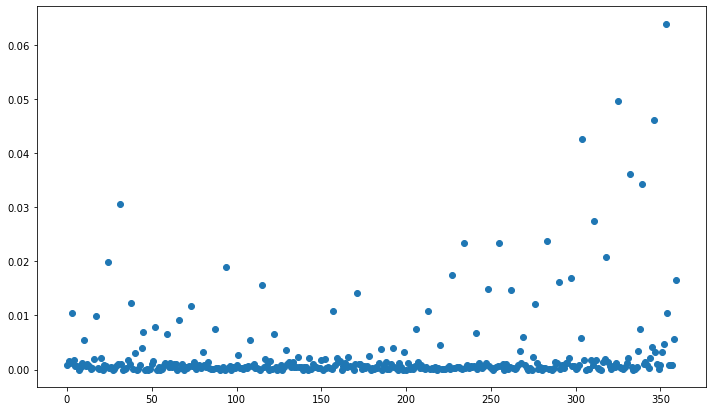

In [90]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
#for x in np.arange(3)*1:
#    plt.axvline(x, linestfyle ='--', color= 'r')
plt.show()

Predecimos

In [91]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

### Análisis

Una vez ejecutado el modelo, observamos la predicción resultante del 3° trimestro del año 2019, siguiendo con una tendencia descendiente como se pudo observar en el grafico de tendencias, y esto nos lleva a concluir que efectivamente los usuarios para ese peaje migraron a otra modalidad de pago.

No obstante también se puede evidenciar que finalizando el año se estabiliza la tendencia ya que no todos los usuarios migran a otro metodo de pago.

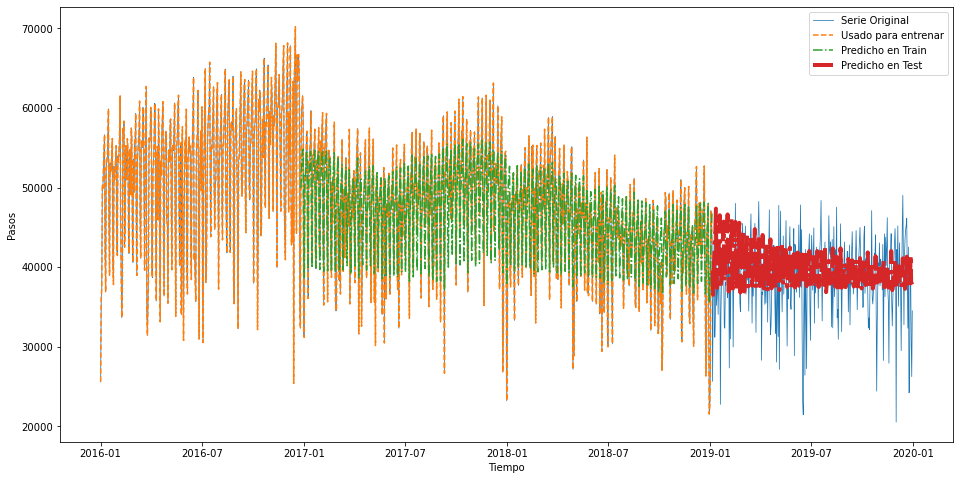

In [92]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Pasos')
plt.show()

Calculamos el error RMSE en train y test.

In [93]:
from sklearn.metrics import r2_score

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Tes: {rmse_test}')
print(f'Coeficiente de Determinacion Train: {r2_score_train}')
print(f'Coeficiente de Determinacion Test: {r2_score_test}')

Raíz del error cuadrático medio en Train: 4046.9627038164554
Raíz del error cuadrático medio en Tes: 4811.960605150944
Coeficiente de Determinacion Train: 0.6876183384062373
Coeficiente de Determinacion Test: 0.03549344411323774


### Análisis

Se evidencia un overfiting de los datos osbre todo en lso datos del test, y se obsevan datos dispersos entre el Train y el Test

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


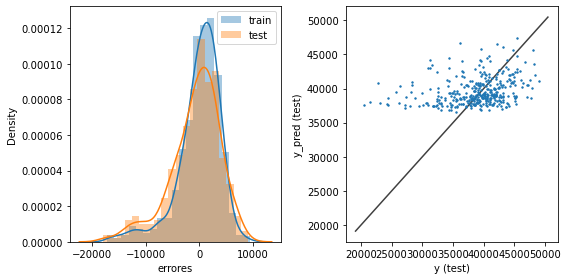

In [94]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

# Hiperparametro Random Search RandomForest


Se utiliza el modelo Random Search ya que como se evidencio en las bitacoras es uno de los modelos más óptimos para generar hiperparametros,se utilizan hasta un n_stimators de 1500, con una profundidad de 5.

una vez ejecutado los hiperparametos que nos generan son utlizado en el model de RandomForest para que el modelo arroje los mejores resultados

In [95]:
# Parametros RandomSearch
param_grid = {'n_estimators': [10,30,70,100,250,450,700,800,1000,1200,1500],
                'max_features': ['auto','sqrt'],
                'max_depth' : np.arange(1, 5),
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf':[1, 2, 4],
                'bootstrap': [False]}

In [96]:
Random_Rforest = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, n_iter = 100, cv=5, verbose=0, random_state=100 , n_jobs = -1)
Random_Rforest.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=4,
                                                   max_features='sqrt',
                                                   min_samples_leaf=4,
                                                   min_samples_split=5,
                                                   n_jobs=4, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': array([1, 2, 3, 4]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 30, 70, 100, 250,
                                                         450, 700, 800, 1000,
                                                         1200, 1

In [97]:
print("Mejores parametros: "+str(Random_Rforest.best_params_))
print("Mejor Score: "+str(Random_Rforest.best_score_)+'\n')

scores = pd.DataFrame(Random_Rforest.cv_results_)
scores.head()

Mejores parametros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}
Mejor Score: 0.3040342632397385



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.790691,0.413088,0.475730,0.214067,800,2,4,sqrt,2,False,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.460891,0.068269,0.461135,0.145020,-0.019632,0.223137,0.201094,36
1,3.373071,0.319383,0.658424,0.162798,450,10,2,sqrt,3,False,"{'n_estimators': 450, 'min_samples_split': 10,...",0.493433,0.160910,0.471615,0.183221,0.068206,0.275477,0.173536,21
2,136.831542,8.440745,1.021816,0.415667,800,10,1,auto,4,False,"{'n_estimators': 800, 'min_samples_split': 10,...",0.164394,-0.352084,0.331376,0.047163,-0.098727,0.018425,0.232840,88
3,57.747253,5.491185,1.395803,0.346822,1200,10,4,auto,1,False,"{'n_estimators': 1200, 'min_samples_split': 10...",0.254787,-0.703880,0.194897,-0.081285,-0.259303,-0.118957,0.346826,98
4,1.282667,0.432759,1.379412,0.299334,10,5,2,sqrt,1,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.318321,-0.156749,0.448945,0.045312,-0.239049,0.083356,0.265295,54


### Analisis

La importancia de la Feature nos indica que el día 353 es el de mayor importnacia para nuestro modelo en la cantidad de pasos

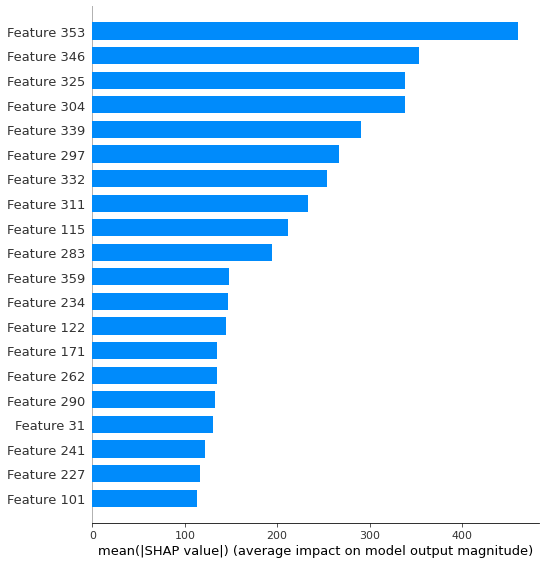

In [98]:
import shap
model = Random_Rforest.best_estimator_
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Benchmark: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

### Analisis

Para nuestro caso, nuestro modelo es mejor y más optimo que el Benchmark y se puede validar con la información resultante del MSE

In [99]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

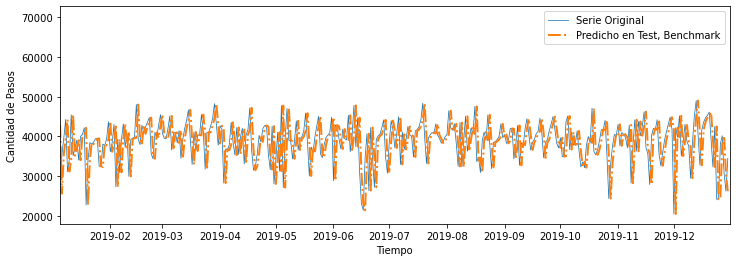

In [100]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

In [101]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

6424.8998776245535


### Multi-Step Prediction

In [103]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)# re-del ultimo valor
y_ms_test_pred = np.array(y_ms_test_pred)

<AxesSubplot:>

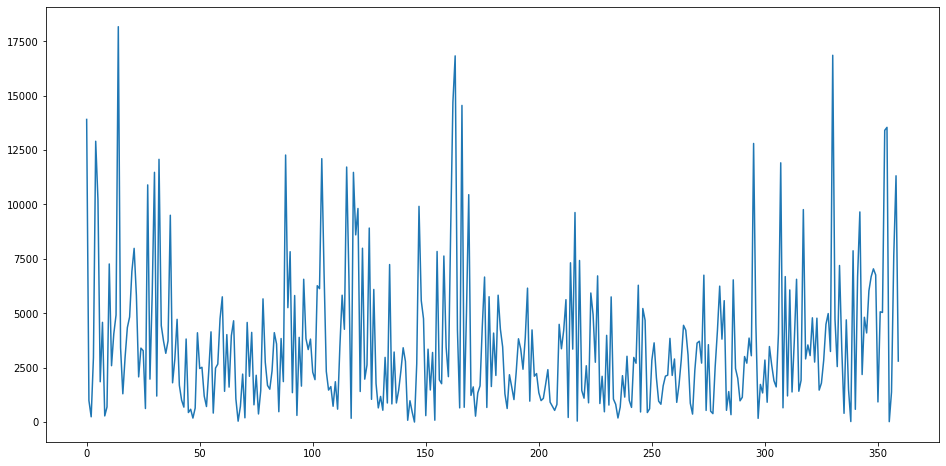

In [104]:
plt.figure(figsize=(16,8))
pred_comp = pd.DataFrame()
pred_comp['y_test'] = y_test
pred_comp['y_test_model'] = y_ms_test_pred
pred_comp['abs_diff'] = abs(pred_comp['y_test']-pred_comp['y_test_model'])
pred_comp['abs_diff'].plot()

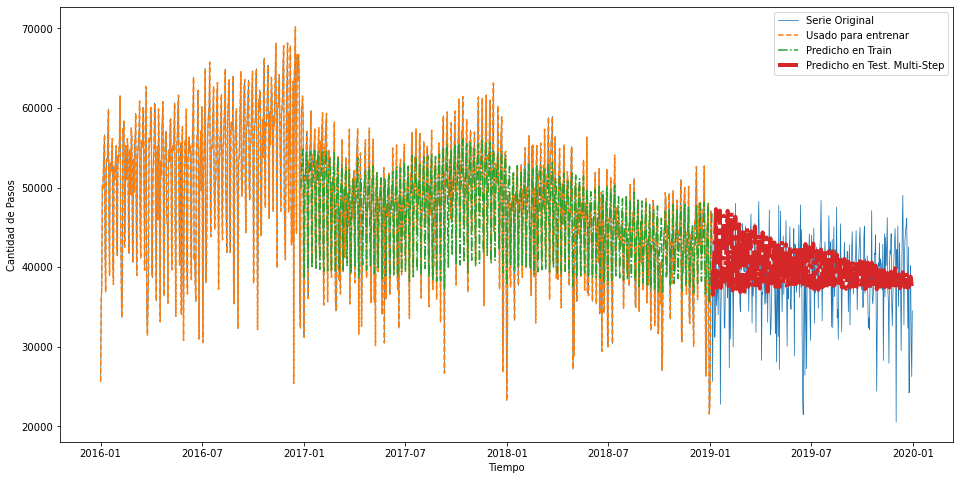

In [105]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

### Analisis

Nuestro modelo sigue dando mejores resultados aun generando el Multi-Step Prediction

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse_test = mean_squared_error(y_test, y_ms_test_pred)
print('Raíz del error cuadrático medio en Test:', np.sqrt(rmse_test))
r2_test = r2_score(y_test, y_ms_test_pred)
print('R2_test' , r2_test )

Raíz del error cuadrático medio en Test: 4860.055542580183
R2_test 0.016116850334150112


## PREDICCIÓN 2020

Para realizar la predicción del año 2020, se utiliza el dataset del año 2020 que fue un año atipico por las condiciones que el mundo presento aacerca del covid-19, para esto se procede a realizar una union entre los dataset del 2016 al 2019 junto con el dataset del 2020. 

Se procede a realizar la eliminación de datos atipicos del dataset 2020, asi mismo se filtra la información por las mismas condiciones de los dataset anterior de peaje Illia y pago en efectivo. 

Para nuestro modelo considere que es la mejor forma de predecir el año 2020 teniendo como referencia los años anteriores que nos van a dar datos suficientes para poder realizar la predicción con datos historicos.

In [114]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [115]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [116]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [117]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [118]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_2020 = data_2020.copy()

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_2020 = np.logical_and(dataset_2020.estacion=='ILLIA', dataset_2020.forma_pago == 'Efectivo')   
dataset_2020 = dataset_2020[mask_2020]   

#Quitamos las columnas que no vamos a utilizar
dataset_2020.drop(columns = ['periodo','hora_inicio',   'hora_fin' , 'mes' , 'dia_fecha' , 'observacion'  ], inplace = True)   

dataset_2020.head()

,fecha,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0
134,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0
135,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0
202,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0


In [119]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha) 

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2020.drop(columns=['fecha',], inplace = True)

dataset_2020.head()

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha2
52,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
53,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0,2020-01-01
134,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0,2020-01-01
135,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0,2020-01-01
202,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0,2020-01-01


In [120]:
#Corregimos el nombre de fecha2 a fecha
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_2020.head()

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
52,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
53,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0,2020-01-01
134,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0,2020-01-01
135,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0,2020-01-01
202,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0,2020-01-01


In [121]:
#Reordenamos el dataset por fecha
dataset_2020.sort_values('fecha', inplace = True)
dataset_2020.reset_index(drop=True, inplace = True)
dataset_2020

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
0,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
1,Miércoles,ILLIA,Pago Doble Auto,Efectivo,Provincia,2.0,2020-01-01
2,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Centro,1.0,2020-01-01
3,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Provincia,2.0,2020-01-01
4,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Centro,2.0,2020-01-01
...,...,...,...,...,...,...,...
52369,Jueves,ILLIA,Moto,Efectivo,Provincia,16.0,2020-12-31
52370,Jueves,ILLIA,Moto,Efectivo,Centro,13.0,2020-12-31
52371,Jueves,ILLIA,Moto,Efectivo,Provincia,8.0,2020-12-31
52372,Jueves,ILLIA,Moto,Efectivo,Provincia,18.0,2020-12-31


In [122]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_final = dataset_2020.resample('D', on = 'fecha').sum()
print(dataset_final.shape)
dataset_final.head(10)

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0
2020-01-06,33835.0
2020-01-07,34413.0
2020-01-08,35762.0
2020-01-09,35926.0


In [123]:
prediccion2020 = pd.concat([diario , dataset_final])
prediccion2020

,cantidad_pasos,yr,mes,fecha_numeros
fecha,,,,
2016-01-01,25602.0,409248.0,1.0,735964.0
2016-01-02,36136.0,510048.0,1.0,735965.0
2016-01-03,37225.0,514080.0,1.0,735966.0
2016-01-04,50312.0,566496.0,1.0,735967.0
2016-01-05,49907.0,562464.0,1.0,735968.0
...,...,...,...,...
2020-12-27,8434.0,NaN,NaN,NaN
2020-12-28,10311.0,NaN,NaN,NaN
2020-12-29,12036.0,NaN,NaN,NaN


### Análisis

Se valida que el dataset de los pasos vehiculares 2020 no presente valores atipicos. En el boxplot se encuentran algunos y se procede a realizar el interp de estos datos.

Text(0.5, 1.0, 'Distribución por número pasos dia')

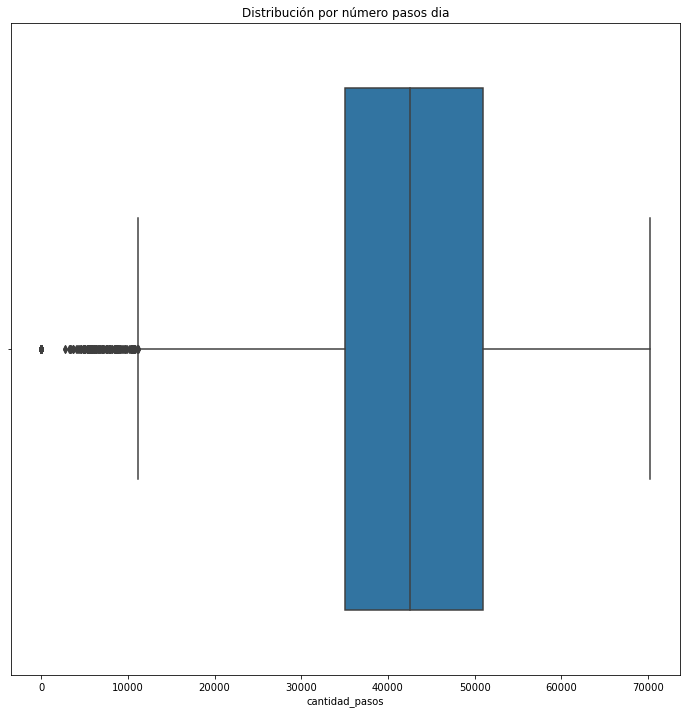

In [127]:
sns.boxplot(data = prediccion2020 , x = "cantidad_pasos").set_title("Distribución por número pasos dia")

In [128]:
#Realizo interpolate
prediccion2020.cantidad_pasos[prediccion2020.cantidad_pasos < 10000] = np.nan
prediccion2020 = prediccion2020.interpolate()
print(prediccion2020.shape)
prediccion2020.head()

(1827, 4)


,cantidad_pasos,yr,mes,fecha_numeros
fecha,,,,
2016-01-01,25602.0,409248.0,1.0,735964.0
2016-01-02,36136.0,510048.0,1.0,735965.0
2016-01-03,37225.0,514080.0,1.0,735966.0
2016-01-04,50312.0,566496.0,1.0,735967.0
2016-01-05,49907.0,562464.0,1.0,735968.0


### Análisis

Como lo he venido explicando en todo el modelo, se evidencia una fuerte caida de pasos en el año 2020, la razón es las caracteristicas a nivel mundial por efectos del covid-19 que tuvo el pasos de vehículos, esto por las restricciones dadas en cada uno de los paises y ciudades en este caso de argentina. 

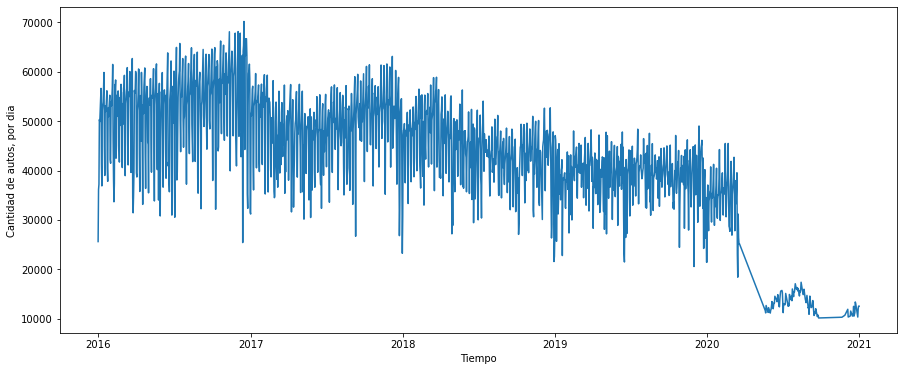

In [129]:
plt.figure(figsize = (15,6))
plt.plot(prediccion2020.index, prediccion2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [130]:
senial_2020 = prediccion2020.cantidad_pasos
senial_2020.head()

fecha
2016-01-01    25602.0
2016-01-02    36136.0
2016-01-03    37225.0
2016-01-04    50312.0
2016-01-05    49907.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [131]:
senial_2020.shape

(1827,)

In [132]:
look_back_2020 = 360

In [133]:
N_2020 = senial_2020.shape[0]  #reduzco el dataset de entreno 366 dias para no tener en cuenta el 2020
X_2020 = np.zeros((N_2020 - look_back_2020 - 1,look_back_2020))
y_2020 = np.zeros(N_2020 - look_back_2020 -1)
print(X_2020.shape, y_2020.shape)

(1466, 360) (1466,)


In [134]:
for i in range(X_2020.shape[0]):
    X_2020[i,:] = senial_2020.iloc[i:i+look_back_2020]
    y_2020[i] = senial_2020.iloc[i+look_back_2020]

In [135]:
print(X_2020.shape)
print(y_2020.shape)

(1466, 360)
(1466,)


In [136]:
X_2020 , y_2020

(array([[25602., 36136., 37225., ..., 63228., 35253., 32338.],
        [36136., 37225., 50312., ..., 35253., 32338., 53153.],
        [37225., 50312., 49907., ..., 32338., 53153., 59662.],
        ...,
        [37067., 30627., 27812., ..., 11964., 11413., 10862.],
        [30627., 27812., 33835., ..., 11413., 10862., 10311.],
        [27812., 33835., 34413., ..., 10862., 10311., 12036.]]),
 array([53153., 59662., 60291., ..., 10311., 12036., 12527.]))

In [137]:
N_train_2020 = 1466 - look_back_2020 # cantidad de instancias que vamos a usar para entrenar. 
N_test_2020 = 360 #cantidad de puntos que vamos a usar para evaluar
N_total_2020 = N_train_2020 + N_test_2020

length_total_2020 = N_train_2020 + N_test_2020 + look_back_2020

X_train_2020 = X_2020[:N_train_2020,:]
y_train_2020 = y_2020[:N_train_2020]
print(X_train_2020.shape, y_train_2020.shape)

X_test_2020 = X_2020[N_train_2020:N_train_2020+N_test_2020,:]
y_test_2020 = y_2020[N_train_2020:N_train_2020+N_test_2020]
print(X_test_2020.shape, y_test_2020.shape)

(1106, 360) (1106,)
(360, 360) (360,)


In [138]:
X_train_2020

array([[25602., 36136., 37225., ..., 63228., 35253., 32338.],
       [36136., 37225., 50312., ..., 35253., 32338., 53153.],
       [37225., 50312., 49907., ..., 32338., 53153., 59662.],
       ...,
       [44266., 31199., 34330., ..., 21447., 21395., 33722.],
       [31199., 34330., 45439., ..., 21395., 33722., 37067.],
       [34330., 45439., 35187., ..., 33722., 37067., 30627.]])

In [139]:
y_train_2020

array([53153., 59662., 60291., ..., 37067., 30627., 27812.])

In [140]:
print (look_back_2020)
print (N_train_2020) 
print (N_test_2020)
print (N_total_2020)
print (length_total_2020)

360
1106
360
1466
1826


# Modelo Avanzado RandomForest

El primero modelo utilizado es RandomForest con 30% en tes y 70% en train, en los estimadores se utilizo el criterio 'MSE' (mean squared error) ya que es nuestro medida de  de validaciòn para nuestros modelo. Este modelo ya tiene todos los criterios que nos arrojo el algortimo de los mejores hiperparametros utilizando el modelo de Random Search (Se puede evidenciar en la parte inferior del modelo). 

Una vez ejecutado no es el más optimo de los modelos optimizados pero nos da una idea para verificar que evidentemente si hay una mejora sustancial.

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf_2020 = RandomForestRegressor(n_estimators=700, criterion = "mse" , max_features='sqrt', max_depth=4 , min_samples_leaf = 4,
                               min_samples_split = 3 , n_jobs=-1, oob_score = False, random_state = 42)
rf_2020.fit(X_train_2020,y_train_2020)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=700, n_jobs=-1,
                      random_state=42)

In [142]:
from sklearn.model_selection import RandomizedSearchCV

# Parametros RandomSearch
param_grid_2020 = {'n_estimators': [10,30,70,100,250,450,700,800,1000,1200,1500],
                'max_features': ['auto','sqrt'],
                'max_depth' : np.arange(1, 5),
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf':[1, 2, 4],
                'bootstrap': [False]}

In [144]:
model_RF_2020 = RandomizedSearchCV(rf_2020, param_grid_2020, n_iter=100, random_state=0, cv=5 , n_jobs = -1  )
model_RF_2020.fit(X_train_2020,y_train_2020)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=32,
                                                   max_features='sqrt',
                                                   min_samples_leaf=3,
                                                   min_samples_split=3,
                                                   n_estimators=113, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': array([1, 2, 3, 4]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 30, 70, 100, 250,
                                                         450, 700, 800,

In [147]:
print("Mejores parametros: "+str(model_RF_2020.best_params_))
print("Mejor Score: "+str(model_RF_2020.best_score_)+'\n')

scores = pd.DataFrame(model_RF_2020.cv_results_)

Mejores parametros: {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}
Mejor Score: 0.3064078375103554



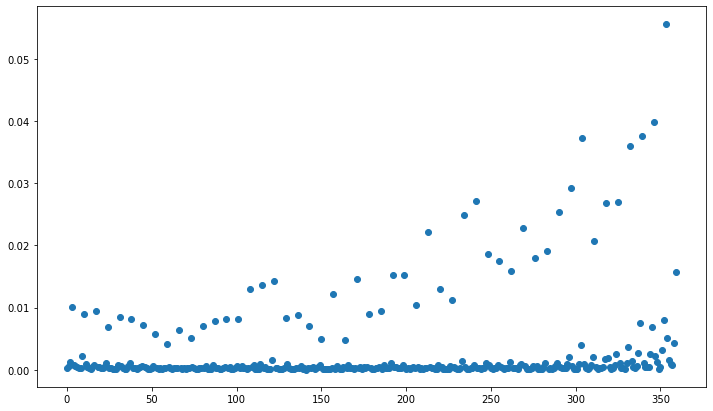

In [150]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf_2020.feature_importances_.size),rf_2020.feature_importances_)
#for x in np.arange(3)*1:
#    plt.axvline(x, linestfyle ='--', color= 'r')
plt.show()

## PREDICCION DEL MODELO 2020

Apesar de las condiciones no establecidas ni conocidas por el modelo, en la predición se observa que dista mucho con respecto al dataset 2020, y los datos utilizados para la predicción nos demuestra que con respecto al ultimo trimestre del año 2019 se puede observar que los pasos de los vehiculo por el peaje Illia en pago en efectivo sigue teniendo una tendencia a la baja, y cada año que se proceda a realizar la predicción surge el mismo efecto. Como lo hemos venido documentando esto tiene una explicación y se debe a la migración de los usuarios a otros metodos de pago como pueden ser pago con tarjeta debito/credito. LLegara un momento en que este tipo de pago sea desestimado por las autoridades argentinas buscando que el paso vehicular fluya más en estos peajes.

In [151]:
y_pred_2020 = rf_2020.predict(X_2020)
y_train_pred_2020 = rf_2020.predict(X_train_2020)
y_test_pred_2020 = rf_2020.predict(X_test_2020)

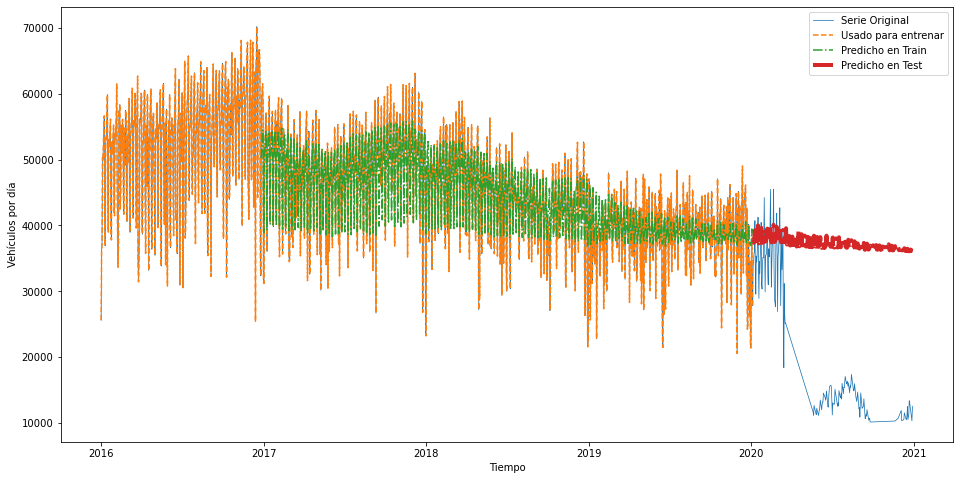

In [152]:
plt.figure(figsize=(16,8))
plt.plot(senial_2020.index[:length_total_2020], senial_2020[:length_total_2020],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[:N_train_2020 + look_back_2020], senial_2020[:N_train_2020 + look_back_2020],'--', label = 'Usado para entrenar')
plt.plot(senial_2020.index[look_back_2020: look_back_2020 + N_train_2020], y_train_pred_2020,'-.',label = 'Predicho en Train')
plt.plot(senial_2020.index[N_train_2020+look_back_2020: length_total_2020], y_test_pred_2020,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Vehículos por día')
plt.show()

In [153]:
from sklearn.metrics import r2_score

rmse_train_2020 = np.sqrt(mean_squared_error(y_train_2020, y_train_pred_2020))
rmse_test_2020 = np.sqrt(mean_squared_error(y_test_2020, y_test_pred_2020))
r2_score_train_2020 = r2_score(y_train_2020, y_train_pred_2020)
r2_score_test_2020 = r2_score(y_test_2020, y_test_pred_2020)

print(f'Raíz del error cuadrático medio en Train: {rmse_train_2020}')
print(f'Raíz del error cuadrático medio en Tes: {rmse_test_2020}')
print(f'Coeficiente de Determinacion Train: {r2_score_train_2020}')
print(f'Coeficiente de Determinacion Test: {r2_score_test_2020}')


Raíz del error cuadrático medio en Train: 4318.081255607743
Raíz del error cuadrático medio en Tes: 21070.101229569587
Coeficiente de Determinacion Train: 0.6750402649041154
Coeficiente de Determinacion Test: -4.036799838224294


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


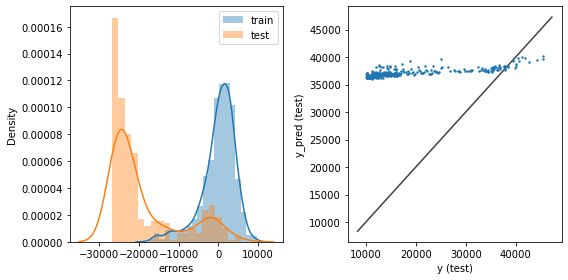

In [154]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_2020 - y_train_pred_2020, bins = 20, label = 'train')
sns.distplot(y_test_2020 - y_test_pred_2020, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test_2020,y_test_pred_2020, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [155]:
y_test_pred_benchmark_2020 = y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1]

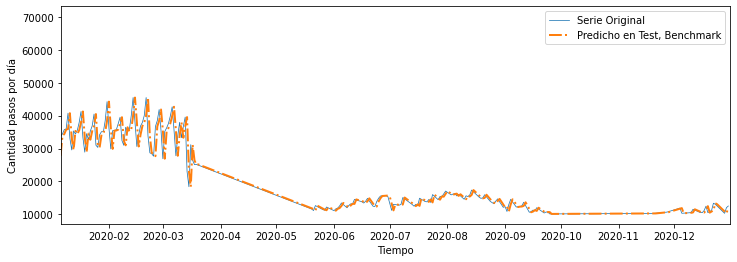

In [156]:
plt.figure(figsize=(12,4))
plt.plot(senial_2020.index[:length_total_2020], senial_2020[:length_total_2020],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020+look_back_2020: length_total_2020], y_test_pred_benchmark_2020,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial_2020.index[N_train_2020+look_back_2020], senial_2020.index[length_total_2020])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos por día')
plt.legend()
plt.show()

In [178]:
y_test_pred_benchmark_2020 = y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1]
MSE_benchmark_2020 = mean_squared_error(y_test_2020, y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1])
print(np.sqrt(MSE_benchmark_2020))


2451.0988600760784


# Conclusión

Dado los datos utlizados y la predicción que nos invitan a realizar para el año 2020 puedo concluir que cualquier prediccióndentro de cualquier modelo para este año en especifico hubiese sido a mi modo de ver fallido por las condiciones en que se presento el año 2020. además cualquier cualquier información utilizada para datos futuros va a presentar errores.

en los Benchmark se puede evidenciar pasos buenos pero pueden existir lapsos de datos en 0 ya que la reactivación de esas condiciones va ser lenta mientras los datos vuelven a estabilizarse, por esta razón utilizar los datos del año 2020 para futuras predicciones no es la mejor opción ya que descompensaria los modelos futuros.

# PARTE C

Para realizar la incorporación de nuevas feature, es necesario crear un nuevo modelo llamese en este caso una red neuronal que nos permita tener varias entradas en la capa principal para que así el modelo pueda ejecutar la red y pueda arrojar una prediccion acertada con respecto a todas las feature que se quieran insertar. Esto en teoria debería mejorar el modelo aunque si vamos a lo que compete con el año 2020 nuevamente distaria mucho el dato arrojado contra la realidad de lo vivido del mismo año. 
Ahora bien ya la pregunta cambiaria, y no solo sería solo en pago en efectivo sino simplemente validariamos la cantidad de pasos por el peaje Illia.

Si se compara la serie con distintas estaciones de peajes pero con pago en Efectivo sucederia el mismo ya que se evidencia que la migración de usuarios a otro metodo de pago es evidente, por tanto el analisis se tendría que hacer en diferentes metodos de pago para saber cual es la preponderancia apartir del año 2019 para esto se necesitaria inforamción auxiliar de dataset del año 2020 y futuros para identificar cuales son esas formas de pago a los cuales elos usuarios estan migrando.

# Prophet

Se realiza la prueba con el algoritmo Prophet de Facebook, con la idea de validar las predicciones para el año 2019 y 2020. Para este caso se evidencia que ambos modelos se presenta una caida en la cantidad de pasos con respecto a los años anteriores, esto debido a que como hemos concluido durante todo trabajo quizás los usuarios han migrado a otras formas de pago. 

Ahora bien, es dificil predecir el año 2020 por la situación que vivida en el mundo con respecto al covid-19, esto hace que diste la información con respecto a la realidad. Por tanto se concluye solo con respecto a la migración de usuarios a otros metodo de pago diferente al efectivo. 

In [576]:
datos_arima = dataset
datos_arima.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,yr,año
0,Viernes,Centro,Liviano,14,2016-01-01,2016,2016
1,Viernes,Centro,Pesado,3,2016-01-01,2016,2016
2,Viernes,Provincia,Liviano,66,2016-01-01,2016,2016
3,Viernes,Provincia,Pesado,1,2016-01-01,2016,2016
4,Viernes,Provincia,Pesado,4,2016-01-01,2016,2016


In [581]:
pasos = datos_arima.groupby(['año'])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )

print(pasos)

      cantidad_pasos
año                 
2016        19221423
2017        17783512
2018        15966944
2019        14115125


In [544]:
fbprophet = datos_arima[['fecha','cantidad_pasos']]
fbprophet.head()

,fecha,cantidad_pasos
0,2016-01-01,14
1,2016-01-01,3
2,2016-01-01,66
3,2016-01-01,1
4,2016-01-01,4


In [545]:
fbprophet.dtypes

fecha             datetime64[ns]
cantidad_pasos             int64
dtype: object

In [548]:
df = fbprophet.rename(columns={'fecha': 'ds',
                        'cantidad_pasos': 'y'})

df.head(5)

,ds,y
0,2016-01-01,14
1,2016-01-01,3
2,2016-01-01,66
3,2016-01-01,1
4,2016-01-01,4


In [619]:
df.shape

(311923, 2)

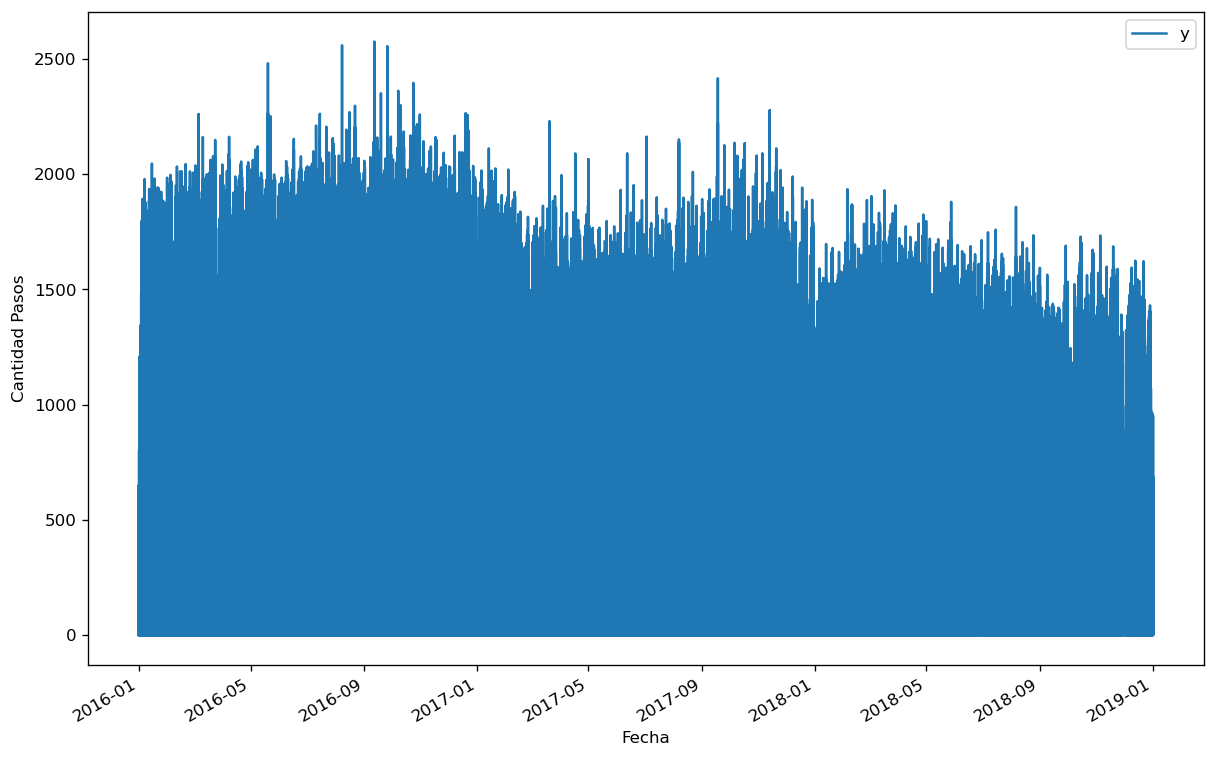

In [590]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Cantidad Pasos')
ax.set_xlabel('Fecha')
plt.show()

In [591]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [592]:
my_model.fit(df)

In [634]:
future_dates = my_model.make_future_dataframe(periods=720, freq='D', include_history=True)
future_dates.tail()

,ds
26855,2020-12-16 23:00:00
26856,2020-12-17 23:00:00
26857,2020-12-18 23:00:00
26858,2020-12-19 23:00:00
26859,2020-12-20 23:00:00


In [635]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26855,2020-12-16 23:00:00,21.124176,-722.249915,810.210352
26856,2020-12-17 23:00:00,25.018866,-707.299772,760.447493
26857,2020-12-18 23:00:00,21.416391,-739.853949,747.995195
26858,2020-12-19 23:00:00,-12.591326,-838.506338,788.530808
26859,2020-12-20 23:00:00,-4.832581,-796.773007,741.413448


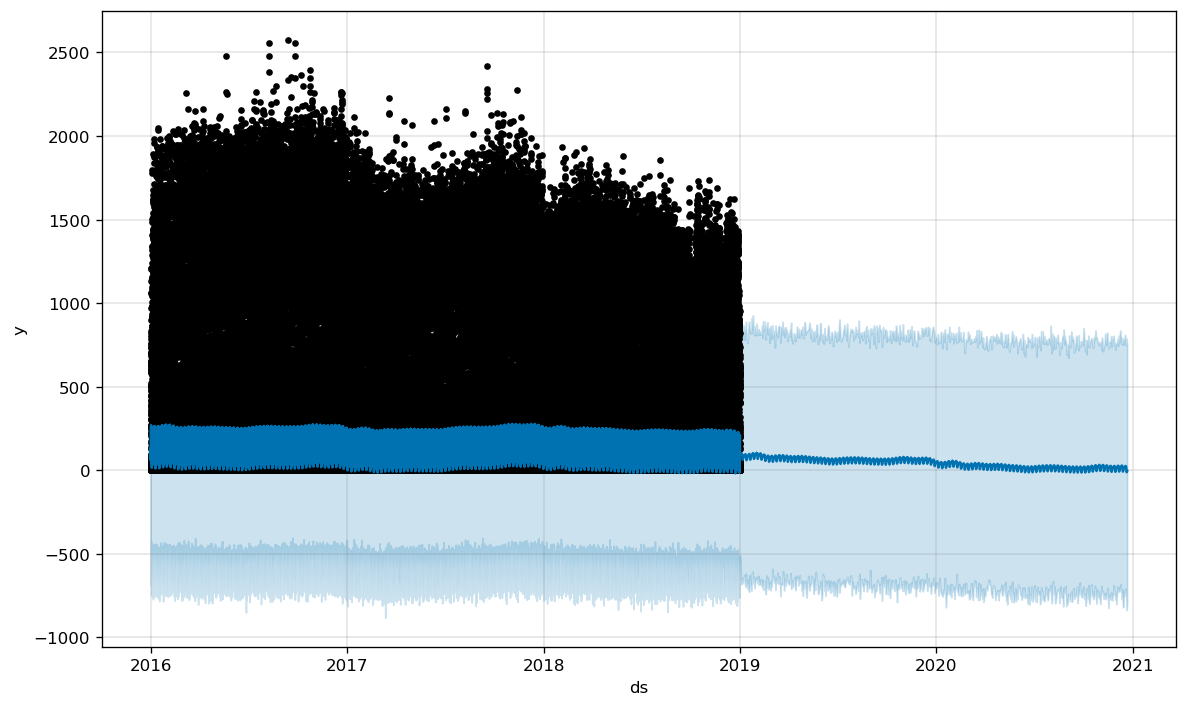

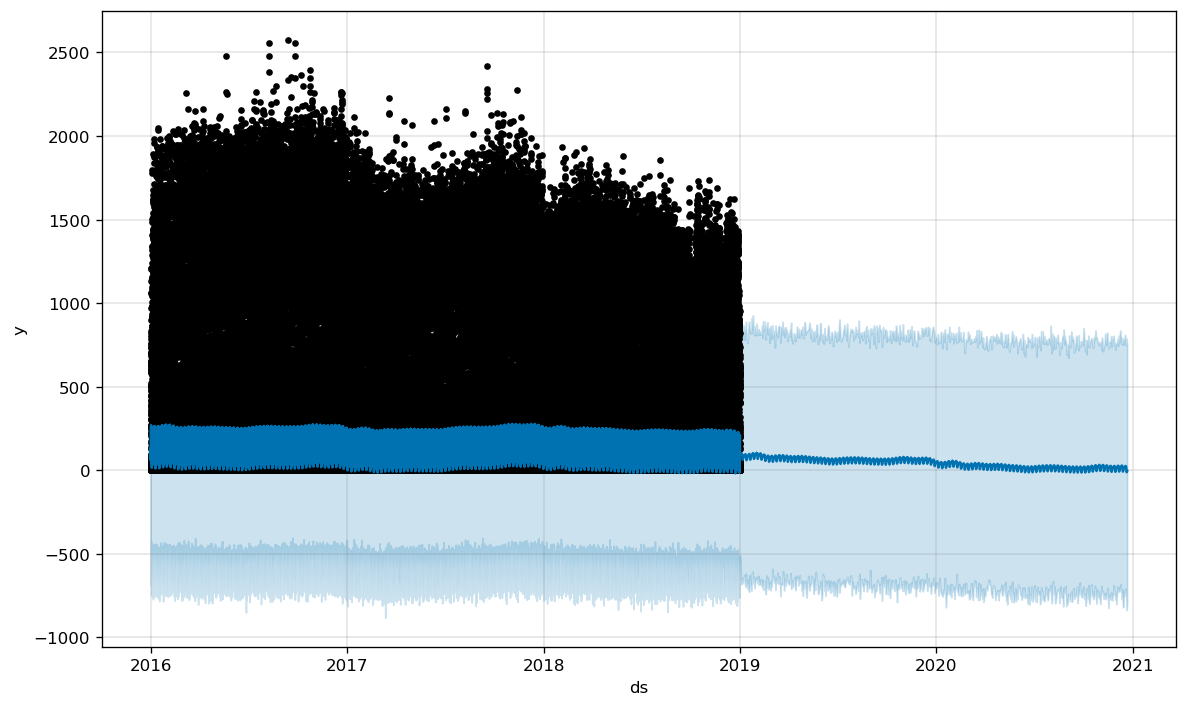

In [636]:
my_model.plot(forecast, uncertainty=True)

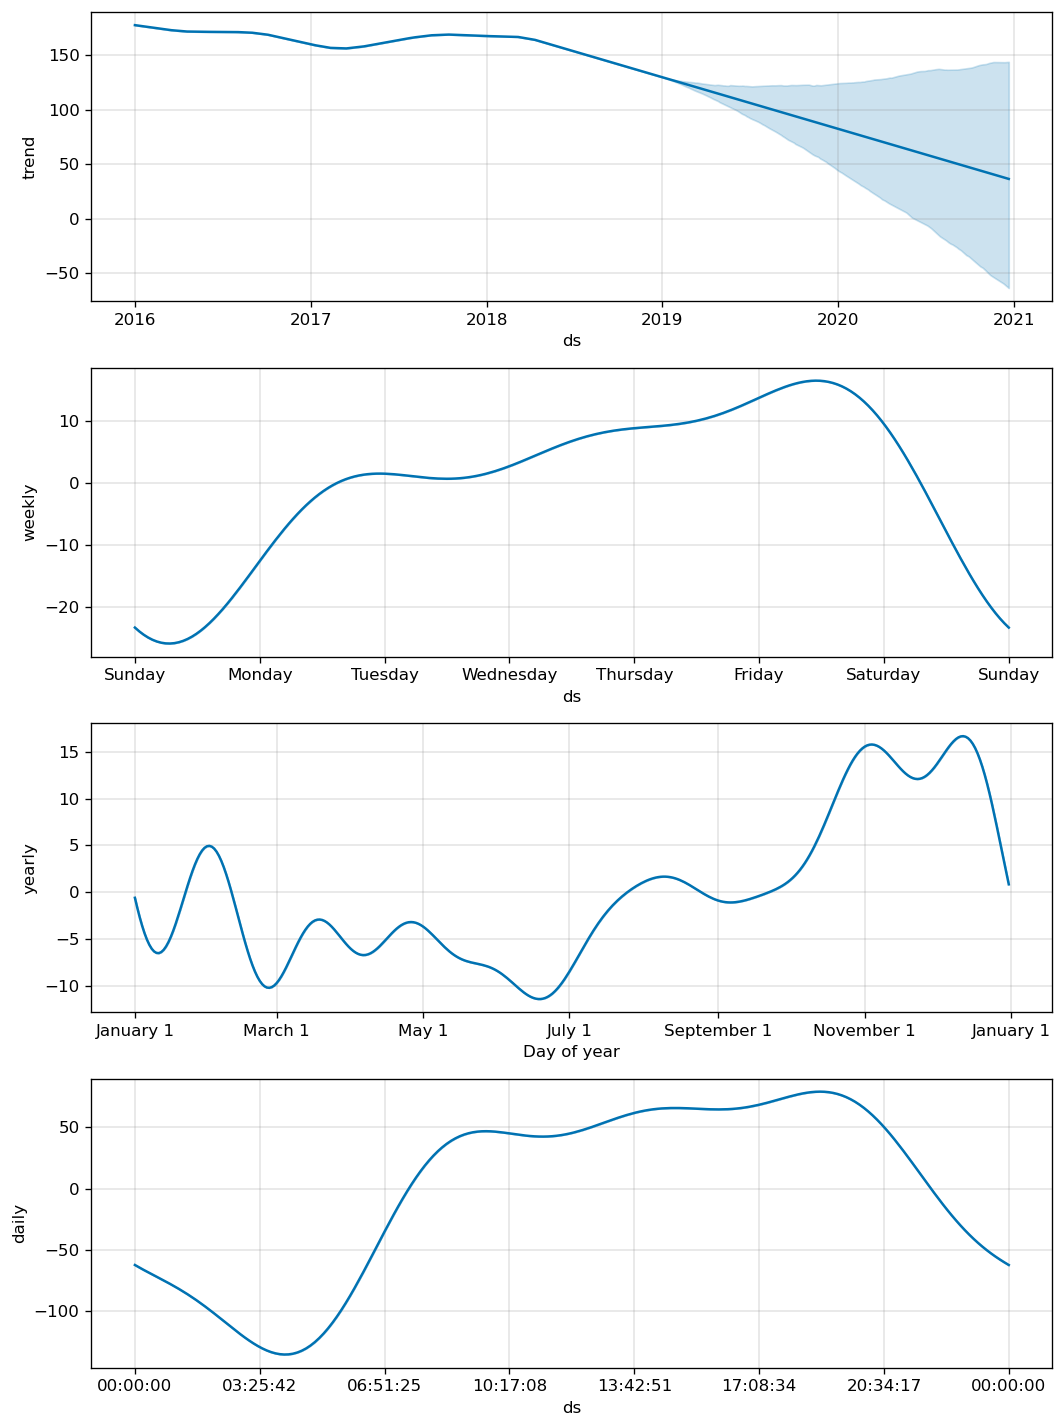

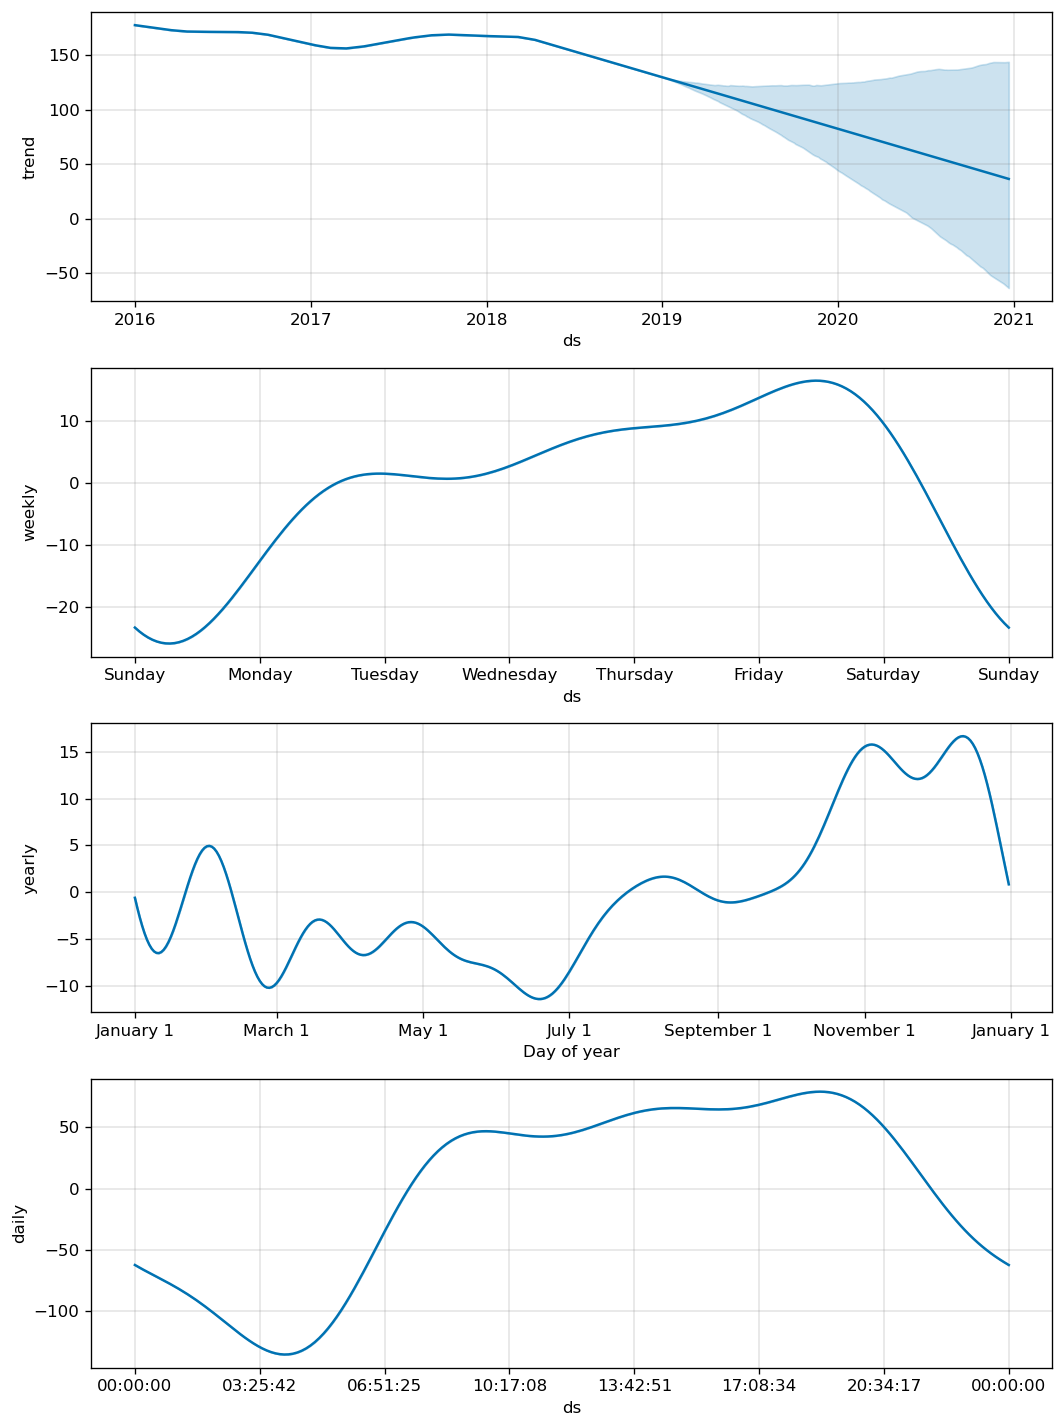

In [637]:
my_model.plot_components(forecast)